# Load Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from Script.path import *
from Script.figure import get_all_max100

# Load Data

In [6]:
data_dir = './Data/data_cn/'
rundata_dir = './Data/rundata_cn/'
df=pd.read_csv(data_dir+"experiment_index.csv", index_col=0)
df = df.sort_values(by='yield')
df.reset_index(drop=True, inplace=True)
df['entry'] = df.index
df.set_index('entry', inplace=True)
ar_ha_smi=df['Aryl_halide_SMILES'].tolist()
add_smi=df['Additive_SMILES'].tolist()
base_smi=df['Base_SMILES'].tolist()
ligand_smi=df['Ligand_SMILES'].tolist()
yield_value=np.array(df['yield'].tolist())

ar_ha_smi_set = sorted(list(set(ar_ha_smi)))
add_smi_set = sorted(list(set(add_smi)))
base_smi_set = sorted(list(set(base_smi)))
ligand_smi_set = sorted(list(set(ligand_smi)))

# Find the Trajectory with the Smallest Cumulative Deviation

In [7]:
all_results = np.load('./Results/results_cn/cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_total.npy',allow_pickle=True)
all_max100=get_all_max100(all_results)
recorded_max_mean = np.array(all_max100).mean(axis=0)

all_diff = []
for i in all_max100:
    tem_diff = 0
    for j in range(10):
        tem_diff += abs(recorded_max_mean[j] - i[j])
    all_diff.append(tem_diff)
test_data = all_results[all_diff.index(min(all_diff))]  

In [8]:
all_results[all_diff.index(min(all_diff))]  

array([ 0.4788194 ,  0.7782341 ,  0.        ,  0.        ,  0.72962296,
        6.034179  , 30.479372  , 39.893665  , 34.472633  , 65.10792   ,
       19.779877  , 13.302155  , 38.834286  , 79.45834   , 64.27234   ,
       44.726074  , 17.858717  , 14.82994   ,  1.9832045 , 36.642857  ,
       49.15372   , 47.94243   , 33.55651   , 31.766245  , 18.412336  ,
       12.241565  , 86.25412   , 12.138862  , 67.31023   , 90.731316  ,
       60.94659   , 41.429756  , 30.758171  , 61.278393  , 54.771355  ,
       24.968002  , 61.048195  , 81.6085    , 80.07437   , 80.06525   ,
       16.85618   , 76.47373   , 53.603043  , 92.25603   , 26.67933   ,
       64.00576   , 90.37136   , 42.706875  , 83.65366   , 84.588936  ])

In [9]:
import glob
for file in glob.glob('./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_*.npy'):
    tem_data = np.load(file,allow_pickle=True)[:,:,4][0]
    tem_sum = 0
    for index in range(50):
        tem_sum += abs(tem_data[index]-test_data[index])
    if  tem_sum < 1:
        print(file)

./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_88.npy


In [10]:
test_data = all_results[34]  
import glob
for file in glob.glob('./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_*.npy'):
    tem_data = np.load(file,allow_pickle=True)[:,:,4][0]
    tem_sum = 0
    for index in range(50):
        tem_sum += abs(tem_data[index]-test_data[index])
    if  tem_sum < 1:
        print(file)

./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_98.npy


# Plot Figure

In [12]:
sorted_ar_ha = get_sort_smi(ar_ha_smi,ar_ha_smi_set,yield_value)
sorted_add = get_sort_smi(add_smi,add_smi_set,yield_value)
sorted_base = get_sort_smi(base_smi,base_smi_set,yield_value)
sorted_ligand = get_sort_smi(ligand_smi,ligand_smi_set,yield_value)

re_target_dict = {}
for i in range(len(ar_ha_smi)):
    re_target_dict[ar_ha_smi[i],ligand_smi[i],add_smi[i],base_smi[i]]=yield_value[i]

re_smi=[]
for i in sorted_ar_ha:
    for j in sorted_ligand:
        re_smi.append([i,j])
con_smi=[]
for i in sorted_add:
    for j in sorted_base:
        con_smi.append([i,j])
x=[]
y=[]        
hf_target=[]
space=[]
for index1,i in enumerate(re_smi):
    for index2,j in enumerate(con_smi):
        x.append(index1)
        y.append(index2)
        try:
            hf_target.append(re_target_dict[(i[0],i[1],j[0],j[1])])  
        except: 
            hf_target.append(0)
        space.append([i[0],i[1],j[0],j[1]])
hf_target=np.array(hf_target).reshape(len(re_smi),len(con_smi))
space = np.array(space).reshape(len(re_smi),len(con_smi),-1)

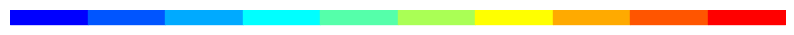

In [ ]:
colors = ["blue", "cyan" ,"yellow", "red"]  
n_colors = 10
cmap = LinearSegmentedColormap.from_list("blue_to_red", colors, N=n_colors)
color_list = cmap(np.linspace(0, 1, n_colors))

plt.figure(figsize=(10, 0.2))
for i, color in enumerate(color_list):
    plt.fill_between([i, i+1], 0, 1, color=color)
plt.xlim(0, n_colors)
plt.axis('off')
#plt.title(f'Generated {n_colors} colors (Blue → Red)')
plt.show()

## Top-K

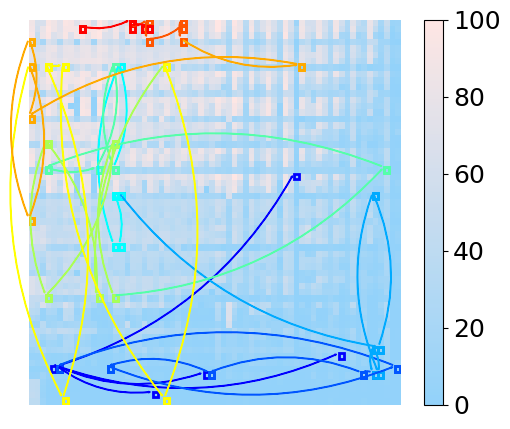

In [ ]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names

cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 
all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_cn-ourwork-1-1-1-100-100-100-low_rate10_dft_Ridge_88.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

## Our work

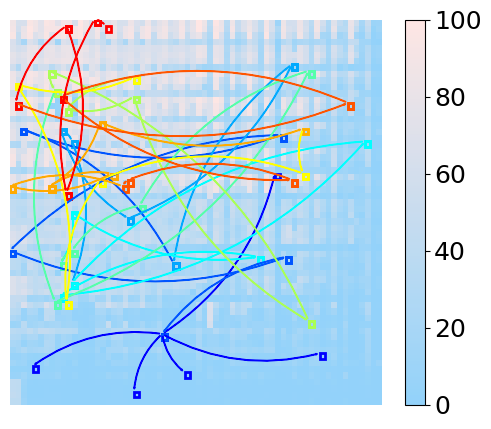

In [16]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_88.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

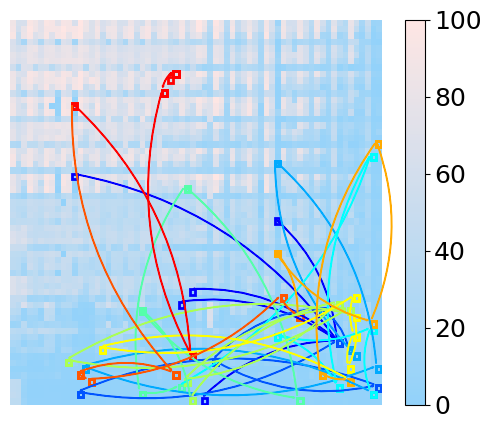

In [17]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_cn-ourwork-4-3-2-50-50-50-low_rate10_dft_Ridge_98.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# PI

In [18]:
index = np.load('./Results/results_bayesian/index_low_10.0_PI.npy')[88]
all_exp_our = np.array(df)[index].reshape(1,50,5)

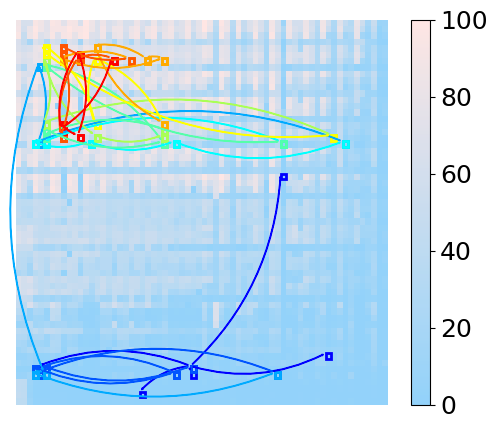

In [19]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

#all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_ourwork0-50-20-low_rate10-seed0_dft_Ridge_19.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# EI

In [20]:
index = np.load('./Results/results_bayesian/index_low_10.0_EI.npy')[88]
all_exp_our = np.array(df)[index].reshape(1,50,5)

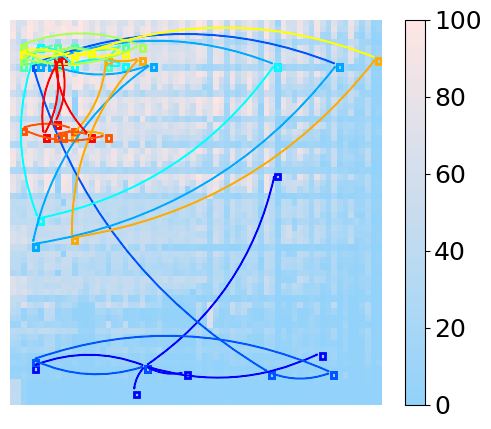

In [21]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

#all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_ourwork0-50-20-low_rate10-seed0_dft_Ridge_19.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB

In [22]:
index = np.load('./Results/results_bayesian/index_low_10.0_UCB.npy')[88]
all_exp_our = np.array(df)[index].reshape(1,50,5)

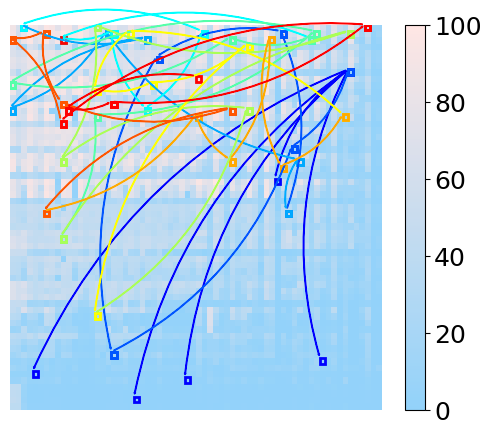

In [23]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

#all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_ourwork0-50-20-low_rate10-seed0_dft_Ridge_19.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB-Standard-√𝟐

In [24]:
index = np.load('./Results/results_bayesian/index_low_10.0_UCBstdgen2.npy')[88]
all_exp_our = np.array(df)[index].reshape(1,50,5)

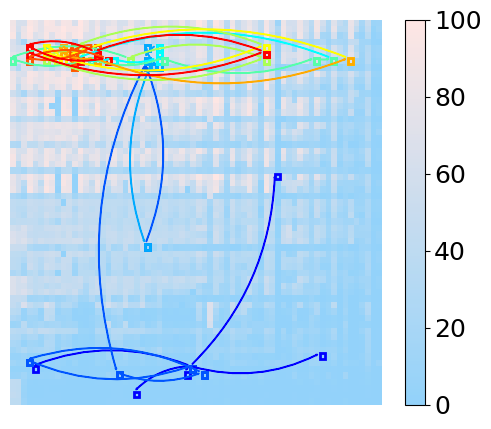

In [25]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

#all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_ourwork0-50-20-low_rate10-seed0_dft_Ridge_19.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()

# UCB-Standard-2

In [26]:
index = np.load('./Results/results_bayesian/index_low_10.0_UCBstd2.npy')[88]
all_exp_our = np.array(df)[index].reshape(1,50,5)

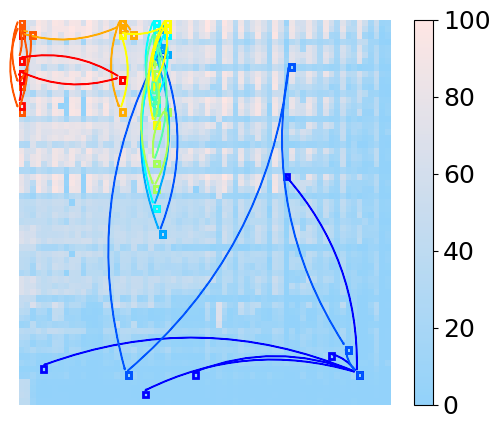

In [27]:
cm = LinearSegmentedColormap.from_list('my_blue_red_colormap', ['lightskyblue',  'mistyrose'], N=256)
fig, ax = plt.subplots(figsize=(6,5))
hm = sns.heatmap(hf_target,annot=False,fmt='.1f',cmap=cm,alpha=0.9, 
                 vmin=0, vmax=100, ax=ax,cbar=False, xticklabels=[], yticklabels=[])#,xticklabels=model_names,yticklabels=desc_names
cb=hm.figure.colorbar(hm.collections[0]) 
cb.ax.tick_params(labelsize=18) 

#all_exp_our = np.load('./Data/rundata_cn/results_optimization/index_ourwork0-50-20-low_rate10-seed0_dft_Ridge_19.npy',allow_pickle=True) 
max_index = np.argmax(all_exp_our[0,:,4])
for index,i in enumerate(all_exp_our):
    index = 5
    x5,y5=get_xy3(i[index],space)
    rect = Rectangle((x5, y5), 0.9, 0.9, fill=None, edgecolor='salmon', linewidth=2)
    ax.add_patch(rect)
    for j in range(5):
        x1,y1=get_xy3(i[j],space)
        x2,y2=get_xy3(i[5],space)
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect1)
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=color_list[0], linewidth=2)
        ax.add_patch(rect2)
        plot_hu(x1,x2,y1,y2,c=color_list[0],ax=ax)
    for m in range(5,49):
        x1,y1=get_xy3(i[m],space)
        x2,y2=get_xy3(i[m+1],space)  
        c1=color_list[int(m/5)]
        c2=color_list[int(m/5)]
        
        rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor=c1, linewidth=2)
        ax.add_patch(rect1)  
        rect2 = Rectangle((x2, y2), 0.9, 0.9, fill=None, edgecolor=c2, linewidth=2)
        ax.add_patch(rect2) 
        plot_hu(x1,x2,y1,y2,c=c1,ax=ax)
    x1,y1=get_xy3(i[max_index],space)
    rect1 = Rectangle((x1, y1), 0.9, 0.9, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect1)  
        
plt.show()